In [1]:
#Basic Libraries
import pandas as pd
import numpy as np

#Library to create the 3D line
from skspatial.objects import Line
from skspatial.objects import Points

#Graphics Libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d


## Generalities
For this project we will create data that has as reference the growth and development of peach fruits, for which we have the time (time), the equatorial diameter (dEcua) and the Longitudinal diameter (dLong).

In [2]:
# Create a function to see the results of the creation of the 3D line
def scatter_plot_3D(datos,linea):
  ax = m3d.Axes3D(plt.figure(figsize=(10,7)))
  ax.plot3D(*linea.T, c="red", linewidth=5)
  ax.scatter3D(*datos.T,marker=".",c="black")
  ax.view_init(10,315)
  ax.set_xlabel("Time")
  ax.set_ylabel("Equatorial Diameter")
  ax.set_zlabel("Longitudinal Diameter")
plt.show()

In [3]:
# We create a function to randomize the created data
def aletoridad_datos(datos,delta):
  datos = datos + np.random.normal(size=datos.shape) * delta
  return datos

## Step 1: Create the data
1. We create an original data line
2. To this line we add randomness to obtain a point cloud with a tendency to be a 3D line
3. We graph the original line and the point cloud to see the result we want to reach with the point cloud.

In [4]:
# We create a data for time, dEcu and dLong as an example
#the ranges of this data are based on the development of peach fruits
x = np.mgrid[0:200:120j] #time
y = np.mgrid[0:6:120j] #equatorial diameter
z = np.mgrid[0:6:120j] #longitudinal diameter

data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

In [5]:
#we add some randomness in the data.
data_1=aletoridad_datos(data,1)

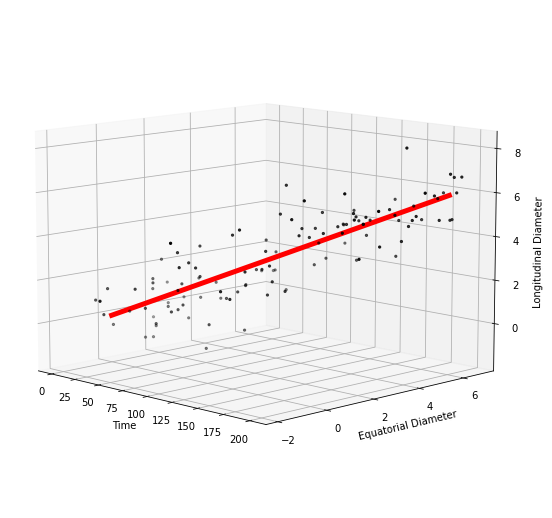

In [6]:
# let's see our data in a graph
scatter_plot_3D(data_1,data)

## Step 2: 3D line fit
For the creation of the 3D line:
1. We calculate the mean of the point cloud.
2. Using SVD for the difference between the data and the mean.
3. Using one of the components we create the line data.
4. We extract a point and a vector to have the nonparametric formula.
5. With the point and the vector we recreate the values that match the dimensions of our dotted line

In [7]:
#Create a function that using SVD (Singular Value Decomposition) allows us to create the vector for our 3D line
def linea_3d(array):
  #The mean of the point cloud is calculated
  datamean = array.mean(axis=0)
  # An SVD (Singular Value Decomposition) is performed between the mean and the data
  uu ,dd ,vv = np.linalg.svd(array-datamean)
  ## the component vv [0] is the first principal component. Gives us the address
  linea_3d=vv[0] *  np.mgrid[-7:7:2j][:, np.newaxis]
  ## We operate the data created with our average data to find the points of our 3d line
  linea_3d += datamean
  punto = linea_3d[0]
  vector = linea_3d[1]-linea_3d[0]
  return punto, vector


In [8]:
#Function to build the 3D line from the point cloud using a previously generated point and vector,
def Construir_linea3D(datos,punto,vector):
  n= len(datos)
  matriz = np.zeros(shape=(n,3))
  for i in range(n):
      alpha=((datos[i][0])-punto[0])/vector[0]
      punto_calc=punto+(alpha*vector)
      matriz[i]=punto_calc
  return matriz 

In [9]:
punto_R3, vector_R3 = linea_3d(data_1)

In [10]:
Linea3D=Construir_linea3D(data_1,punto_R3,vector_R3)

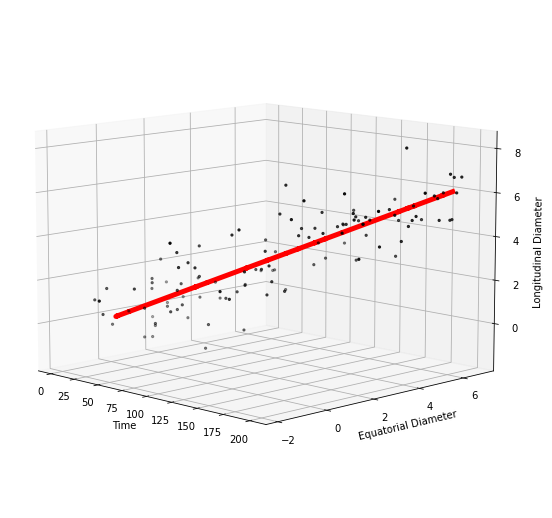

In [11]:
scatter_plot_3D(data_1,Linea3D)

## Step 3: Fit 3D line with Scikit-spatial
We are going to use the scikit-spatial library to generate the 3D line.

In [12]:
points = Points(data_1)
line_fit = Line.best_fit(points)
punto2_R3=np.array(line_fit.point)
vector2_R3=np.array(line_fit.vector)

In [13]:
Linea2_3D=Construir_linea3D(data_1,punto2_R3,vector2_R3)

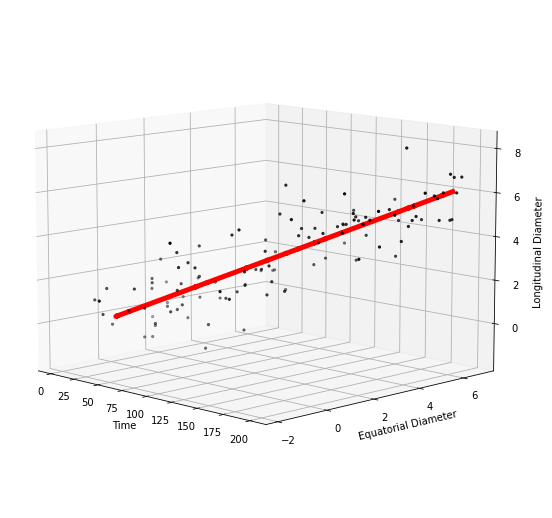

In [14]:
scatter_plot_3D(data_1,Linea2_3D)

## Step 4: Compare the results
We are going to compare the original line (blue) with those generated by the programmed method (red) and the one generated by the scikit-spatial library

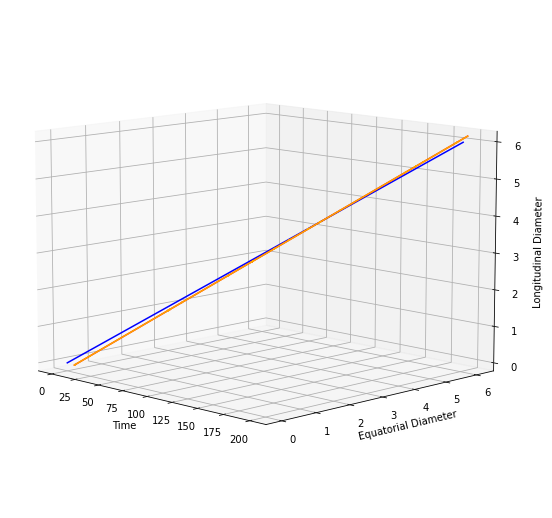

In [17]:
#Confirmation of the success of the 3d line creation using the two methods
ax = m3d.Axes3D(plt.figure(figsize=(10,7)))
#ax.scatter3D(*data_1.T)
ax.plot3D(*data.T,"blue")
ax.plot3D(*Linea3D.T, "red")
ax.plot3D(*Linea2_3D.T, "orange")
ax.view_init(10, 315)
ax.set_xlabel("Time")
ax.set_ylabel("Equatorial Diameter")
ax.set_zlabel("Longitudinal Diameter")
plt.show()

#### We can see that both methods are indeed equivalent and are very close to the original line.

## Step 5: Obtain the parametric equation.
The vector equation for a 3D line can be defined as follows:
$$ (x, y, z) = (x 0, y 0, z 0) + \alpha (v 1, v 2, v 3) $$
For our 3D line of peach fruits it would be:
$$ (x, y, z) = (100.07,3.149, 3.051) + \alpha (0.999198, 0.02996106,0.02656469) $$


However we can also find the parametric equation.
It is defined as follows:
$$ \frac {x-x_ {0}} {v1} = \frac {y-y_ {0}} {v2} = \frac {z-z_ {0}} {v3} $$
For this case we will use the sympy library

In [ ]:
import sympy as s

In [ ]:
#Function to generate the parametric equation
def ecuacion(punto,vector):
  x,y,z,a = s.symbols('x y z a')
  a1=punto[0]+(vector[0]*a)-x
  a2=punto[1]+(vector[1]*a)-y
  a3=punto[2]+(vector[2]*a)-z
  sol1=s.solve(a1,a)
  sol2=s.solve(a2,a)
  sol3=s.solve(a3,a)
  ecuX=s.nsimplify(sol1[0], tolerance=0.0001)
  ecuY=s.nsimplify(sol2[0], tolerance=0.0001)
  ecuZ=s.nsimplify(sol3[0], tolerance=0.0001)
  return ecuX, ecuY, ecuZ

In [ ]:
ecuacion(punto2_R3,vector2_R3)

### Vector equation
$$ (x, y, z) = (100.07,3.149, 3.051) + \alpha (0.999198, 0.02996106,0.02656469) $$

### Parametric equation
$$ \frac {9975x} {9967} - \frac {849628} {8483} = \frac {12583y} {377} - \frac {653630} {6217} = \frac {71260z} {1893} - \frac { 891467} {7760} $$